In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("mymoviedb.csv")
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,07-01-2022,The Commando,An elite DEA agent returns home after a failed...,1750.484,33.0,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,12-01-2022,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821.0,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,10-02-2022,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,17-02-2022,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114.0,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,03-11-2021,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726.0,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [3]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


C:\Users\user\AppData\Local\Temp\ipykernel_9564\3021251979.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [6]:
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols , axis = 1 , inplace = True )
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896.0,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8.0,3.5,Horror
9824,2016,The Offering,13.355,94.0,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152.0,6.7,"Music, Drama, History"


In [9]:
def categorize_col(df,col ,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] =pd.cut(df[col],edges,labels = labels  , duplicates = 'drop')
    return df 
    

In [10]:
labels = ['not_popular', 'below_avg','average' ,'popular']

categorize_col(df, 'Vote_Average',labels)
df['Vote_Average'].unique

<bound method Series.unique of 0           popular
1           popular
2         below_avg
3           popular
4           average
           ...     
9822        popular
9823    not_popular
9824    not_popular
9825        average
9826        popular
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']>

In [11]:
df.head(20)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_avg,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33.0,average,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821.0,average,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206.0,below_avg,Thriller
8,2022,Fistful of Vengeance,1594.013,114.0,not_popular,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726.0,popular,Science Fiction


In [12]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [13]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


In [14]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 756.7+ KB


In [16]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# What is the most Frequent genre of movies released on netflix

In [17]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

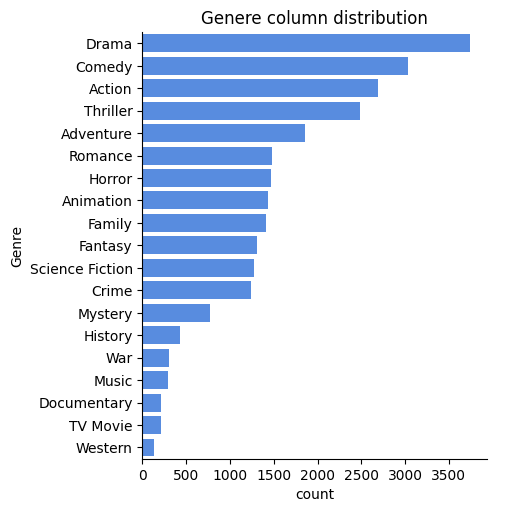

In [18]:
sns.catplot(y ='Genre' ,data = df ,kind = 'count',
            order  = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genere column distribution')
plt.show()

# which has the highest votes in vote avg column

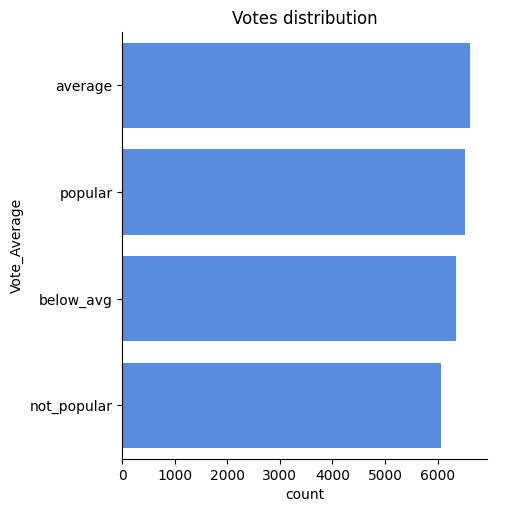

In [19]:
sns.catplot(y = 'Vote_Average', data = df ,kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Votes distribution')
plt.show()

# What movie got the highest popularity? what's its genre ?

In [20]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


# What movie got the lowest popularity? what's its genre?

In [21]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25790,1984,Threads,13.354,186.0,popular,War
25791,1984,Threads,13.354,186.0,popular,Drama
25792,1984,Threads,13.354,186.0,popular,Science Fiction


# Which year has most filmmed  movies ?

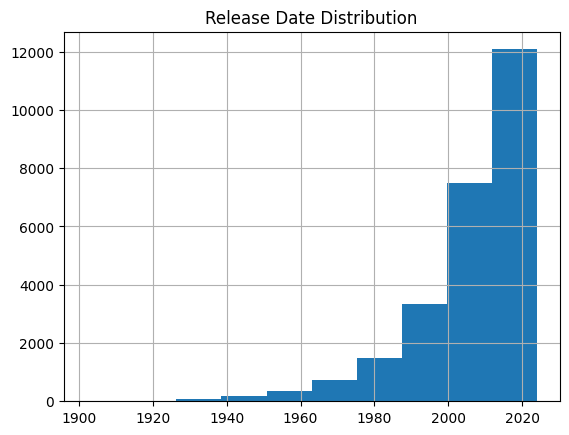

In [24]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()
